# Introducción

En este ejercicio implementamos varios modelos base de tipos distintos (heterogeneos) con distintos meta-modelos en base a los mismos modelos base para usar 
la tecnica de Stacking, el dataset es Iris y su objetivo es clasificar dependiendo algunas caracteristicas de la flor que tipo de flor es (setosa, versicolor o virginica). La idea es usar la biblioteca **sklearn**.

Para evaluar el rendimiento del modelo se emplearon métricas de clasificación como accuracy, precision, recall y f1-score, obtenidas a través del **classification_report** de scikit-learn.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Cargar dataset
df = pd.read_csv("./Datasets/Iris.xls")

print(df.describe())

# El feature 'Id' no se usa ya que es irrelevante para el problema
X = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

y = df["Species"]

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


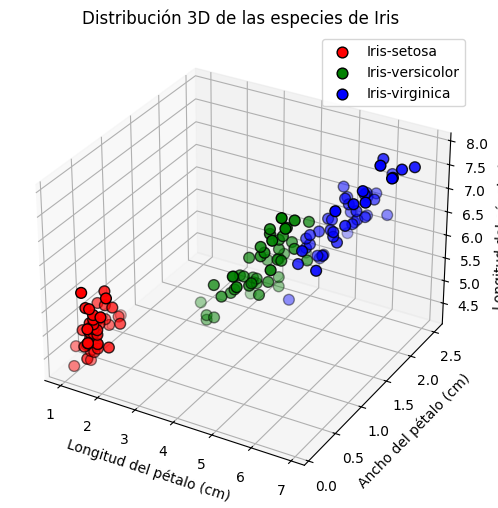

<Figure size 640x480 with 0 Axes>

In [3]:
# Grafico 3d para ver 3 de las 4 caracteristicas y observar que estan bastante linealmente separables, la setosa mas que nada,
# luego un poco de solapamiento entre las otras 2 tipos de flor pero muy poquito.
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

x_col = "PetalLengthCm"
y_col = "PetalWidthCm"
z_col = "SepalLengthCm"

for especie, color in zip(y.unique(), ['red', 'green', 'blue']):
    ax.scatter(
        df.loc[y == especie, x_col],
        df.loc[y == especie, y_col],
        df.loc[y == especie, z_col],
        label=especie,
        color=color,
        s=60,
        edgecolor='black'
    )

ax.set_xlabel("Longitud del pétalo (cm)")
ax.set_ylabel("Ancho del pétalo (cm)")
ax.set_zlabel("Longitud del sépalo (cm)")
ax.set_title("Distribución 3D de las especies de Iris")
ax.legend()
plt.show()
plt.tight_layout()

In [4]:
# Separamos 80% entrenamiento y 20% validacion los datos 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definimos como modelos bases a dt, knn, logistic_regresion
base_models = [('dt', DecisionTreeClassifier(max_depth=6, random_state=42)),
               ('knn', KNeighborsClassifier(n_neighbors=10)), 
                ('lr', LogisticRegression())
              ]

# Diferentes meta-modelos para ver como funcionan en base a los modelos base
meta_model = LogisticRegression(max_iter=200)
meta_model2 = DecisionTreeClassifier(max_depth=2)
meta_model3 = RandomForestClassifier()

In [5]:
# Tecnica de ensemble stacking para los distintos meta-modelos

stack_model = StackingClassifier(
            estimators = base_models,     # dt, knn y logistic regression
            final_estimator=meta_model    # logistic regression
            )

stack_model.fit(x_train,y_train)

y_pred = stack_model.predict(x_test)
y_pred_train = stack_model.predict(x_train)

print("Meta-modelo usado: Regresion logistica\n")
print("Datos de validacion:")
print(classification_report(y_test, y_pred))
print("Datos de entrenamiento:")
print(classification_report(y_train, y_pred_train))

Meta-modelo usado: Regresion logistica

Datos de validacion:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Datos de entrenamiento:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      0.98      0.99        41
 Iris-virginica       0.97      1.00      0.99        39

       accuracy                           0.99       120
      macro avg       0.99      0.99      0.99       120
   weighted avg       0.99      0.99      0.99       120



In [6]:
stack_model2 = StackingClassifier(
            estimators = base_models,     # dt, knn y logistic regression
            final_estimator=meta_model2   # arbol de decision
            )

stack_model2.fit(x_train,y_train)

y_pred = stack_model2.predict(x_test)
y_pred_train = stack_model2.predict(x_train)

print("meta-modelo usado: Arbol de decision\n")
print("datos de validacion:")
print(classification_report(y_test, y_pred))
print("datos de entrenamiento:")
print(classification_report(y_train, y_pred_train))

meta-modelo usado: Arbol de decision

datos de validacion:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

datos de entrenamiento:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       1.00      0.93      0.96        41
 Iris-virginica       0.93      1.00      0.96        39

       accuracy                           0.97       120
      macro avg       0.98      0.98      0.97       120
   weighted avg       0.98      0.97      0.97       120



In [7]:
stack_model3 = StackingClassifier(
            estimators = base_models,     # dt, knn y logistic regression
            final_estimator=meta_model3   # random forest
            )

stack_model3.fit(x_train,y_train)

y_pred = stack_model3.predict(x_test)
y_pred_train = stack_model3.predict(x_train)

print("meta-modelo usado: Random Forest\n")
print("datos de validacion:")
print(classification_report(y_test, y_pred))
print("datos de entrenamiento:")
print(classification_report(y_train, y_pred_train))

meta-modelo usado: Random Forest

datos de validacion:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

datos de entrenamiento:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.93      0.95        41
 Iris-virginica       0.93      0.97      0.95        39

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



# Conclusión

Al ser un dataset bastante chico con 150 datos, solo con 3 clases y bien separadas los resultados muestran que los 3 testeos con diferentes meta-modelos son casi perfectos, el mejor por poco es LogisticRegresion, esto se debe a la simpleza y a la linealidad de la entrada, aunque los otros 2 testeos son muy buenos tambien con un muy pequeño underfitting (0.97 de datos de entrenamiento contra 1.0 de validacion).